In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [31]:
iris = datasets.load_iris()
y_true = iris.target
x = iris.data

In [32]:
print(y_true.shape)
print(x.shape)

(150,)
(150, 4)


In [33]:
#Applying kmeans to the dataset by creating the KMeans classifier object
kmeans = KMeans(n_clusters = 3, max_iter = 1000)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
y_kmeans = kmeans.predict(x)
print(y_kmeans.shape)
print(y_true.shape)

(150,)
(150,)


In [35]:
accuracy_score(y_true, y_kmeans)

0.23999999999999999

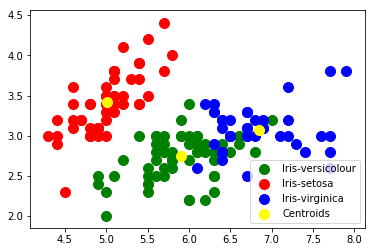

In [36]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [37]:
class K_Means:
    def __init__(self, k = 2, max_iter = 100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter
        
    def fit(self, data):
        self.means = []
        # randomly initialise means
        # using first k points as our means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            # assign the data points to the cluster they belong to
            clusters = []
            for j in range(self.k):  # k subarrays
                clusters.append([])    # create empty cluster because you are reassigning points to clusters

            for point in data:
                # find distance from all mean values
                distances = [((point-m)**2).sum() for m in self.means]   # feature wise subtraction

                # find minimum distance
                minDistance = min(distances)

                # find the mean for which we got the minimum distance --> l
                l = distances.index(minDistance)

                # add this point to cluster l
                clusters[l].append(point)

            # calculate the new mean values
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis=0)
                if not np.array_equal(self.means[j], new_mean):
                     change = True
                self.means[j] = new_mean
            if change is False:
                break
            self.means = np.array(self.means)

    def predict(self, test_data):
        predictions = []
        for point in test_data:
            # find distance from all mean values
            distances = [((point-m)**2).sum() for m in self.means]   # feature wise subtraction

            # find minimum distance
            minDistance = min(distances)

            # find the mean for which we got the minimum distance --> l
            l = distances.index(minDistance)

            predictions.append(l)
        return np.array(predictions)

In [38]:
k_means = K_Means(3, 1000)
k_means.fit(x)
y_k_means = k_means.predict(x)

constructor


In [39]:
k_means.means

array([[ 6.85384615,  3.07692308,  5.71538462,  2.05384615],
       [ 5.88360656,  2.74098361,  4.38852459,  1.43442623],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ]])

In [40]:
kmeans.cluster_centers_

array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

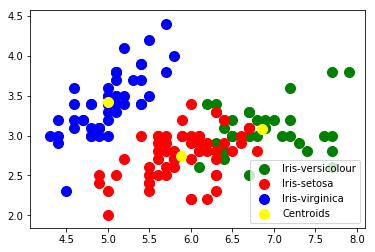

In [41]:
#Visualising the clusters
plt.scatter(x[y_k_means == 0, 0], x[y_k_means == 0, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_k_means == 1, 0], x[y_k_means == 1, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_k_means == 2, 0], x[y_k_means == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(k_means.means[:, 0], k_means.means[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

In [43]:
print("For inbuilt KMeans:")
print("confusion matrix: ")
print(confusion_matrix(y_true, y_kmeans))
print("classification report :")
print(classification_report(y_true, y_kmeans))

For inbuilt KMeans:
confusion matrix: 
[[ 0 50  0]
 [48  0  2]
 [14  0 36]]
classification report :
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        50
          1       0.00      0.00      0.00        50
          2       0.95      0.72      0.82        50

avg / total       0.32      0.24      0.27       150



In [44]:
print("For implemented K_Means:")
print("confusion matrix:")
print(confusion_matrix(y_true, y_k_means))
print("classification report :")
print(classification_report(y_true, y_k_means))

For implemented K_Means:
confusion matrix:
[[ 0  0 50]
 [ 3 47  0]
 [36 14  0]]
classification report :
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        50
          1       0.77      0.94      0.85        50
          2       0.00      0.00      0.00        50

avg / total       0.26      0.31      0.28       150

